# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализировать возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from scipy import stats as st

import seaborn as sns
import matplotlib.pyplot as plt 


from sklearn.linear_model import LinearRegression

In [2]:
data0 = pd.read_csv('/datasets/geo_data_0.csv')
data1 = pd.read_csv('/datasets/geo_data_1.csv')
data2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
data0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
data1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
data2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [6]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
print("Пропуски в данных геологоразведки Региона-1")
print(data0.isna().sum())
print("Пропуски в данных геологоразведки Региона-2")
print(data1.isna().sum())
print("Пропуски в данных геологоразведки Региона-3")
print(data2.isna().sum())

Пропуски в данных геологоразведки Региона-1
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Пропуски в данных геологоразведки Региона-2
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Пропуски в данных геологоразведки Региона-3
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


Данные показывают отсутствие пропусков

In [10]:
print("Дубликаты в данных геологоразведки Региона-1")
print(data0.duplicated().sum())
print("Дубликаты в данных геологоразведки Региона-2")
print(data1.duplicated().sum())
print("Дубликаты в данных геологоразведки Региона-3")
print(data2.duplicated().sum())

Дубликаты в данных геологоразведки Региона-1
0
Дубликаты в данных геологоразведки Региона-2
0
Дубликаты в данных геологоразведки Региона-3
0


В данных нет явных дубликов

In [11]:
data0['id'].value_counts()

fiKDv    2
Tdehs    2
HZww2    2
A5aEY    2
bsk9y    2
        ..
KGhgS    1
AdBtZ    1
13KkC    1
DzJ1D    1
8cA03    1
Name: id, Length: 99990, dtype: int64

In [12]:
data1['id'].value_counts()

wt4Uk    2
LHZR0    2
5ltQ6    2
bfPNe    2
7mu0m    1
        ..
xcwQl    1
3JEsG    1
7QnAl    1
QqaSY    1
sxaPE    1
Name: id, Length: 99996, dtype: int64

In [13]:
data2['id'].value_counts()

Vcm5J    2
KUPhW    2
xCHr8    2
VF7Jo    2
TMz8s    1
        ..
eLgoQ    1
0q6Hh    1
u6W3f    1
nZe2i    1
H0dAE    1
Name: id, Length: 99996, dtype: int64

In [14]:
data0['id'] = data0['id'].drop_duplicates(keep='first')
data1['id'] = data1['id'].drop_duplicates(keep='first')
data2['id'] = data1['id'].drop_duplicates(keep='first')

data0['id'].value_counts()

2McE8    1
RhIbe    1
nXWwy    1
w9tmr    1
M2eQg    1
        ..
DzJ1D    1
Hh5mQ    1
DCh8i    1
gHx7R    1
8cA03    1
Name: id, Length: 99990, dtype: int64

In [15]:
data1['id'].value_counts()

X6I0M    1
XRtKK    1
VGIwj    1
AA0Sv    1
C9Bs4    1
        ..
3JEsG    1
7QnAl    1
QqaSY    1
Zpaez    1
sxaPE    1
Name: id, Length: 99996, dtype: int64

In [16]:
data2['id'].value_counts()

X6I0M    1
XRtKK    1
VGIwj    1
AA0Sv    1
C9Bs4    1
        ..
3JEsG    1
7QnAl    1
QqaSY    1
Zpaez    1
sxaPE    1
Name: id, Length: 99996, dtype: int64

Столбец 'id' содержал дубли, которые были обработаны

In [17]:
def data_seaborn(data):
    sns.heatmap(data.corr(), annot = True, fmt='.1g', linewidths=2, linecolor='black')

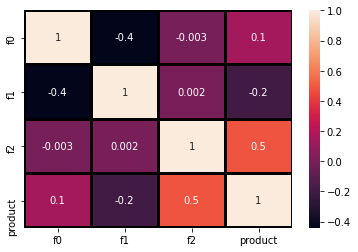

In [18]:
data_seaborn(data0)

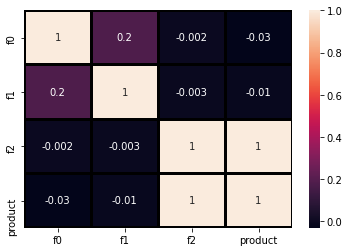

In [19]:
data_seaborn(data1)

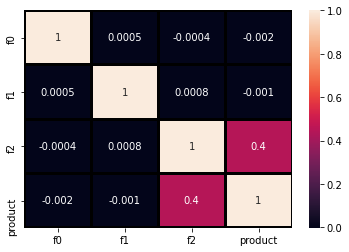

In [20]:
data_seaborn(data2)

Во Втором Регионе в отличии от оставшихся двух, объём запасов в скважине сильно коррелируется со значение в столбце f2

Во всех регионах product имеет отрицательные, местами очень слабые, корреляционные зависимости с f0 и f1

In [21]:
data0 = data0.drop(['id'], axis=1)
data1 = data1.drop(['id'], axis=1)
data2 = data2.drop(['id'], axis=1)

Столбец 'id' не несёт никакой ценности для обучения модели, поэтому можно от него избавится во всех трех наборах данных

In [22]:
data0.columns

Index(['f0', 'f1', 'f2', 'product'], dtype='object')

In [23]:
data1.columns

Index(['f0', 'f1', 'f2', 'product'], dtype='object')

In [24]:
data2.columns

Index(['f0', 'f1', 'f2', 'product'], dtype='object')

In [25]:
data0.shape

(100000, 4)

In [26]:
data1.shape

(100000, 4)

In [27]:
data2.shape

(100000, 4)

In [28]:
print("Основные статистические характеристики в данных геологоразведки Региона-1")
print(data0.describe())
print()
print("Основные статистические характеристики в данных геологоразведки Региона-2")
print(data1.describe())
print()
print("Основные статистические характеристики в данных геологоразведки Региона-3")
print(data2.describe())

Основные статистические характеристики в данных геологоразведки Региона-1
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347

Основные статистические характеристики в данных геологоразведки Региона-2
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.

В распоряжении три набора данных по 100000 строк и по 4 столбца на каждый датасет. Данные были проверены:
- на наличие явных и неявных дубликатов, 
- на наличие пропусков, 
- изучены основные статистические характеристики, 
- проведен корреляционный анализ. 

В процессе работы было принято решение отказаться от столбца 'id', так как значение не влияет на процесс обучения модели.

## Обучение и проверка модели

- 2.1. Разбить данные на обучающую и валидационную выборки в соотношении 75:25.
- 2.2. Обучить модель и сделать предсказания на валидационной выборке.
- 2.3. Сохранить предсказания и правильные ответы на валидационной выборке.
- 2.4. Напечатать на экране средний запас предсказанного сырья и RMSE модели.
- 2.5. Проанализировать результаты.


In [29]:
#Переменные для признаков и целевого признака Региона-1
features0 = data0.drop(['product'], axis=1)
target0 = data0['product']

In [30]:
#Переменные для признаков и целевого признака Региона-2
features1 = data1.drop(['product'], axis=1)
target1 = data1['product']

In [31]:
#Переменные для признаков и целевого признака Региона-3
features2 = data2.drop(['product'], axis=1)
target2 = data2['product']

In [32]:
features_train0, features_valid0, target_train0, target_valid0 = train_test_split(
    features0, target0, test_size=0.25, random_state=12345)

print('Тренировочная выборка Региона-1:', features_train0.shape)
print('Валидационная выборка Региона-1:', features_valid0.shape)

Тренировочная выборка Региона-1: (75000, 3)
Валидационная выборка Региона-1: (25000, 3)


In [33]:
features_train1, features_valid1, target_train1, target_valid1 = train_test_split(
    features1, target1, test_size=0.25, random_state=12345)

print('Тренировочная выборка Региона-2:', features_train1.shape)
print('Валидационная выборка Региона-2:', features_valid1.shape)

Тренировочная выборка Региона-2: (75000, 3)
Валидационная выборка Региона-2: (25000, 3)


In [34]:
features_train2, features_valid2, target_train2, target_valid2 = train_test_split(
    features2, target2, test_size=0.25, random_state=12345)

print('Тренировочная выборка Региона-3:', features_train2.shape)
print('Валидационная выборка Региона-3:', features_valid2.shape)

Тренировочная выборка Региона-3: (75000, 3)
Валидационная выборка Региона-3: (25000, 3)


In [35]:
model0 = LinearRegression()
model0.fit(features_train0, target_train0)
predicted_valid0 = model0.predict(features_valid0)

print("Cредний запас предсказанного сырья = ", predicted_valid0.mean())

Cредний запас предсказанного сырья =  92.59256778438035


In [36]:
model1 = LinearRegression()
model1.fit(features_train1, target_train1)
predicted_valid1 = model1.predict(features_valid1)

print("Cредний запас предсказанного сырья = ", predicted_valid1.mean())

Cредний запас предсказанного сырья =  68.728546895446


In [37]:
model2 = LinearRegression()
model2.fit(features_train2, target_train2)
predicted_valid2 = model2.predict(features_valid2)

print("Cредний запас предсказанного сырья = ", predicted_valid2.mean())

Cредний запас предсказанного сырья =  94.96504596800489


In [38]:
predicted_valid0

array([ 95.89495185,  77.57258261,  77.89263965, ...,  61.50983303,
       118.18039721, 118.16939229])

In [39]:
predicted_valid1

array([ 82.66331365,  54.43178616,  29.74875995, ..., 137.87934053,
        83.76196568,  53.95846638])

In [40]:
predicted_valid2

array([ 93.59963303,  75.10515854,  90.06680936, ...,  99.40728116,
        77.77991248, 129.03241718])

In [41]:
def ddd(features_valid, target_valid, predicted_valid):

    mse_2 = mean_squared_error(target_valid, predicted_valid)

    print("Стандартное отклонение MSE =", mse_2)
    print("Разница между значениями RMSE =", mse_2 ** 0.5)
    
    #Среднее абсолютное отклонение
    print("Среднее абсолютное отклонение MAE регионa = ", mean_absolute_error(target_valid, predicted_valid))
    
    #Коэффициент детерминации
    print("Мера общей точности модели R2 региона = ",  r2_score(target_valid, predicted_valid))

In [42]:
predicted_valid0 = ddd(features_valid0, target_valid0, predicted_valid0)

Стандартное отклонение MSE = 1412.2129364399243
Разница между значениями RMSE = 37.5794217150813
Среднее абсолютное отклонение MAE регионa =  30.919600777151313
Мера общей точности модели R2 региона =  0.27994321524487786


In [43]:
predicted_valid1 = ddd(features_valid1, target_valid1, predicted_valid1)

Стандартное отклонение MSE = 0.7976263360391157
Разница между значениями RMSE = 0.893099286775617
Среднее абсолютное отклонение MAE регионa =  0.7187662442124758
Мера общей точности модели R2 региона =  0.9996233978805127


In [44]:
predicted_valid2 = ddd( features_valid2, target_valid2, predicted_valid2)

Стандартное отклонение MSE = 1602.3775813236196
Разница между значениями RMSE = 40.02970873393434
Среднее абсолютное отклонение MAE регионa =  32.792652105481814
Мера общей точности модели R2 региона =  0.20524758386040443


Данные разбиты на обучающую и валидационную выборки в соотношении 75:25. Обучена модель линейной регрессии и сделаны предсказания на валидационной выборке

- Наилучшее значение RMSE среди моделей:
  * Регион1 = 37.5794217150813
  * Регион2 = 0.893099286775617
  * Регион3 = 40.02970873393434
  
  
- Наилучшее значение MAE среди моделей:
  * Регион1 = 30.919600777151313
  * Регион2 = 0.7187662442124758
  * Регион3 = 32.792652105481814
  
  
- Наилучшее значение R2 среди моделей:
  * Регион1 = 0.27994321524487786
  * Регион2 = 0.9996233978805127
  * Регион3 = 0.20524758386040443

## Подготовка к расчёту прибыли

 - 3.1. Все ключевые значения для расчётов сохранить в отдельных переменных.
 - 3.2. Рассчитать достаточный объём сырья для безубыточной разработки новой скважины. Сравнить полученный объём сырья со средним запасом в каждом регионе. 
 - 3.3. Написать выводы по этапу подготовки расчёта прибыли.


In [41]:
mean_predicted_valid0 = predicted_valid0.mean()
mean_predicted_valid1 = predicted_valid1.mean()
mean_predicted_valid2 = predicted_valid2.mean()

product_units = 450
points = 500
best_points = 200
budget = 1e+7

In [42]:
point_1 = budget / best_points
min_volume = point_1 / product_units

print('Достаточный объём сырья для безубыточной разработки новой скважины: %.2f' %min_volume, 'тыс.баррелей')

Достаточный объём сырья для безубыточной разработки новой скважины: 111.11 тыс.баррелей


In [43]:
print('Cредний запас Регионе1 = ', mean_predicted_valid0)
print('Cредний запас Регионе2 = ', mean_predicted_valid1)
print('Cредний запас Регионе3 = ', mean_predicted_valid2)

Cредний запас Регионе1 =  92.59256778438035
Cредний запас Регионе2 =  68.728546895446
Cредний запас Регионе3 =  94.96504596800489


Для безубыточной разработки новой скважины необходимо 111.11 тыс.баррелей, что больше средного запаса по регионам


Исходя из результатов исследовани становится очевидно, что предсказанного сырья недостаточно даже для окупаемости проекта. В связи с чем, необходимо реализовать функцию для расчёта прибыли по выбранным 200 лучшим скважинам. Далее посчитать риски и прибыль для каждого региона.

## Написать функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
- 4.1. Выберать скважины с максимальными значениями предсказаний. 
- 4.2. Просуммировать целевое значение объёма сырья, соответствующее этим предсказаниям.
- 4.3. Рассчитать прибыль для полученного объёма сырья.

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

In [44]:
def revenue(target, probabilities, count):
    
    
    target = pd.Series(target).reset_index(drop=True)
    probabilities = pd.Series(probabilities).reset_index(drop=True)
    
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    
    return ((450 * selected.sum()) - budget) / 1000

In [45]:
revenue(target_valid0, predicted_valid0, 200)

3320.8260431398508

In [46]:
revenue(target_valid1, predicted_valid1, 200)

2415.0866966815124

In [47]:
revenue(target_valid2, predicted_valid2, 200)

2710.349963599833

## Расчёт прибыли и рисков 

Посчитайте риски и прибыль для каждого региона:
-  5.1. Применить технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
-  5.2. Найти среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
-  5.3. Написать выводы: предложить регион для разработки скважин и обосновать выбор.

In [48]:
def bootstap(target, probabilities):
    
    values = []
    count=0
    state = np.random.RandomState(12345)
    predict = pd.Series(probabilities, index=target.index)
    
    for i in range(1000):
        
        target_subsample = target.sample(500, replace=True, random_state=state)
        probs_subsample = predict[target_subsample.index]  
        values.append(revenue(target_subsample, probs_subsample, 200))
    
    for i in values:
        if i < 0:
            count +=1
    
    values = pd.Series(values)
    mean = values.mean()
    
    confidence_interval = st.t.interval(0.95, len(values)-1, values.mean(), values.sem())
    
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    
    print("Средняя прибыль: {:.2f} млн.руб".format(mean))
    print("95й доверительный интервал:", confidence_interval)
    print('Прибыль с вероятностью в 95% будет в диапазоне с {:.2f} млн.руб до {:.2f} млн.руб'
          .format((lower), (upper)))
    print('Процент вероятности убытка региона: {:.1%}'.format(count/1000))

In [49]:
bootstap(target_valid0, predicted_valid0)

Средняя прибыль: 396.16 млн.руб
95й доверительный интервал: (379.6203151479725, 412.7096544567697)
Прибыль с вероятностью в 95% будет в диапазоне с -111.22 млн.руб до 909.77 млн.руб
Процент вероятности убытка региона: 6.9%


In [50]:
bootstap(target_valid1, predicted_valid1)

Средняя прибыль: 456.05 млн.руб
95й доверительный интервал: (443.14724866390054, 468.942962909421)
Прибыль с вероятностью в 95% будет в диапазоне с 33.82 млн.руб до 852.29 млн.руб
Процент вероятности убытка региона: 1.5%


In [51]:
bootstap(target_valid2, predicted_valid2)

Средняя прибыль: 404.40 млн.руб
95й доверительный интервал: (387.44579747128034, 421.3619356654332)
Прибыль с вероятностью в 95% будет в диапазоне с -163.35 млн.руб до 950.36 млн.руб
Процент вероятности убытка региона: 7.6%


Минимальный процент вероятности убытка у Региона2 = 1.5%. Средняя прибыль составляет 453.81 млн.руб

**ОБЩИЙ ВЫВОД**

В рамках проекта были представлены данные компании «ГлавРосГосНефть»

**Цель** - Определить регион с максимальной суммарной прибылью отобранных скважин.

В процессе реализации проекта были выполнены следующие шаги:
- Подготовлены данные для последующих манипуляций;
- Обучена модель линейной регрессии;
- Рассчитан достаточный объём сырья для безубыточной разработки новой скважины;
- Реализована функция для расчёта прибыли по выбранным скважинам и предсказаниям модели;
- Посчитаны риски и прибыль для каждого региона.

По результатам исследования наиболее прибыльным является *Реогион1*:
- Средняя прибыль: 456.05 млн.руб
- 95й доверительный интервал: (443.14724866390054, 468.942962909421)
- Прибыль с вероятностью в 95% будет в диапазоне с 33.82 млн.руб до 852.29 млн.руб
- Процент вероятности убытка региона: 1.5%